## Team: The Untouchables
#### Members: Gerdin Ventura Croussett, Frank Choukouali Noumbissie, Armando Taveras
#### Introduction / Motivation: Predict whether college player is going to the NBA or not based on their stats. (incomplete intro)

## Introduction/ Motivation:

#### With the NBA finals around the corner and the NBA playoffs being played our group has been constantly watching every game and analyzing all of the players stats trying to figure out who is going to win it all. From analyzing these stats we found ourselves interested in finding what role statistics play in the draft process. We want to figure out whether there is a high correlation between better statistics and getting drafted into the NBA. Is it their offense, defense, efficiency, School? Throughout this project we aim to answer this question by analyzing statistics from players that declared for the NBA draft that were drafted and also the players who went undrafted. By the end of this project we will try to create a model that can predict whether a player will be drafted or not based on their statistics.

### Step 1 - Importing Dependencies
#### The first step is to import important libraries that will allow us to obtain, modify, and visualize the data in an efficient yet elegant way. We will be using pandas and numpy to clean and modify the data, seaborn to create data visualizations, and requests to send GET requests to the server the data is stored on. We are also using json, re (regular expressions), and beautiful soup to scrape and parse the data into a neat and readable table format.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Part 1 :  Data Collection
### Step 1 - Generating URL Scrape Info
#### Now that we have all our dependencies, the next step is to figure out the endpoint (URL) to which we will be requesting the data from. The website <a href="https://www.basketball-reference.com" target="_blank">basketball-reference</a> has an abundance of data about basketball ranging anywhere from NBA Drafts, Season Leaders, Team Stats, Individual Player Stats, and more! We will be using this website as our data source since they are constantly updating the data and there's a wide variety of information which we can pull many insights from. 

#### Since the objective of this project is to be able to predict whether a college basketball player will be drafted into the NBA or not, we will be looking at the draft data which can be found <a href="https://www.basketball-reference.com/draft/" target="_blank">here</a>. Note: the draft data is split by the year and ranges back to 1947. Since college basketball has been changing rapidly over the years with players improving at an impressive rate, we will only focus on the last 20 years which will eliminate some noise in the data set since players from the older times did not average high numbers. 

#### Now that we know what our data is and why we are selecting it, let's find the URL of the site we will scrape. Start off by selecting different draft years to see how the URL changes accordingly. What do you notice? Well, there is a base URL of 'https://www.basketball-reference.com/draft/' which is then followed by `NBA_{year}.html` where {year} is the current year we selected. For example, if I selected the 2021 draft, the URL would be `https://www.basketball-reference.com/draft/NBA_2021.html`. Finally, let's create a list of URL's, one for each year's draft that we want to scrape. 

In [76]:
# Years we'll be scraping
years_list = []

# Populate the list with the years
for year in range(2000, 2022):
    years_list.append("NBA_" + str(year))
    
# Create a list of all the url's we will scrape
draft_url_list = []
for year in years_list:
    URL = "https://www.basketball-reference.com/draft/" + year + ".html"
    draft_url_list.append(URL)

# Print the results
draft_url_list

['https://www.basketball-reference.com/draft/NBA_2000.html',
 'https://www.basketball-reference.com/draft/NBA_2001.html',
 'https://www.basketball-reference.com/draft/NBA_2002.html',
 'https://www.basketball-reference.com/draft/NBA_2003.html',
 'https://www.basketball-reference.com/draft/NBA_2004.html',
 'https://www.basketball-reference.com/draft/NBA_2005.html',
 'https://www.basketball-reference.com/draft/NBA_2006.html',
 'https://www.basketball-reference.com/draft/NBA_2007.html',
 'https://www.basketball-reference.com/draft/NBA_2008.html',
 'https://www.basketball-reference.com/draft/NBA_2009.html',
 'https://www.basketball-reference.com/draft/NBA_2010.html',
 'https://www.basketball-reference.com/draft/NBA_2011.html',
 'https://www.basketball-reference.com/draft/NBA_2012.html',
 'https://www.basketball-reference.com/draft/NBA_2013.html',
 'https://www.basketball-reference.com/draft/NBA_2014.html',
 'https://www.basketball-reference.com/draft/NBA_2015.html',
 'https://www.basketball

#### Great! We now have a list of URL's that we'll scrape our data from. Click on one of the links and look at the information that is provided to us. Some relevant information that the table shown in each URL provides is: the player's name, the college they went to (if they attended college), and their stats in the NBA. Now, let's create a helper function that uses requests, beautiful soup, and pandas to request the data and neatly display it in a table, given some URL. Also, not every player drafted attended college. Some players played overseas. As a result, we must make sure we remove those entries who did not play college basketball and we must update the columns in our table that contain special characters since overseas players sometimes have special characters in their name.

In [77]:
# Helper function that scrapes draft data
def scrape_draft_data(url_to_req):
    # sending get request and saving the response as response object
    r = requests.get(url = url_to_req)

    # extracting data in json format
    data = r.content

    # Getting the html we need from the site
    soup = BeautifulSoup(data, "html.parser")
    tb = soup.findAll("table") #td

    # read_html returns a list of tables so we must index @ 0 to get the table
    table = pd.read_html(str(tb[0]), header=1)[0]

    # Filter out all the players that aren't in college. Also filter the extra rows
    table = table[table['College'].notna()]
    table = table[table['Rk'].notna()]
    
    # Replace special characters that mess up the url (overseas players)
    table = table.replace({'Player': {'č': 'c', 'Í': 'I', 'š' : 's'}}, regex=True)
    
    return table

#### Now that are helper function is created, let's loop through our list of URL's for the draft data and call our scrape_draft_data function which will return a table to us. We can store that table in a list, then concatenate all the tables in our list together to have one united table with all the data.

In [78]:
tables_list = []
for url in draft_url_list:
    table = scrape_draft_data(url)        # Scrape the url and get the table
    tables_list.append(table)             # Add the table to list of tables so we can merge later
joined_tables = pd.concat(tables_list)    # Merge all our tables together
joined_tables                             # Display the table

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1,1,NJN,Kenyon Martin,Cincinnati,15,757,23134,9325,5159,1439,.483,.234,.629,30.6,12.3,6.8,1.9,48.0,.100,0.1,12.1
1,2,2,VAN,Stromile Swift,LSU,9,547,10804,4582,2535,275,.473,.074,.699,19.8,8.4,4.6,0.5,21.3,.095,-1.6,1.1
3,4,4,CHI,Marcus Fizer,Iowa State,6,289,6032,2782,1340,352,.435,.191,.691,20.9,9.6,4.6,1.2,2.7,.022,-3.7,-2.6
4,5,5,ORL,Mike Miller,Florida,17,1032,27812,10973,4376,2666,.459,.407,.769,26.9,10.6,4.2,2.6,60.7,.105,0.8,19.8
5,6,6,ATL,DerMarr Johnson,Cincinnati,7,344,5930,2121,769,304,.411,.336,.789,17.2,6.2,2.2,0.9,6.4,.052,-1.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,55,55,OKC,Aaron Wiggins,Maryland,1,50,1209,416,178,68,.463,.304,.729,24.2,8.3,3.6,1.4,1.2,.048,-4.3,-0.7
57,56,56,CHO,Scottie Lewis,Florida,1,2,7,1,0,1,NaN,NaN,.500,3.5,0.5,0.0,0.5,0.0,.164,6.0,0.0
58,57,57,CHO,Balsa Koprivica,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,58,58,NYK,Jericho Sims,Texas,1,41,555,90,169,21,.722,NaN,.414,13.5,2.2,4.1,0.5,1.5,.128,-1.7,0.0


#### Awesome! We have successfully scraped all the data from the NBA Drafts 2000-2021. There are a total of 1,037 college basketball players drafted in the last 21 years which means that on average, there are about 49 college basketball players drafted into the NBA each year. Earlier we mentioned how the stats displayed in this table are the player's NBA stats. Since the college basketball and the NBA are different leagues, it would not make sense to compare the stats since the NBA is significantly harder to perform well more consistently. Instead, we must find the college stats of the players drafted and use that to create and train our model. 

#### To get the college stats for a drafted player, we must scrape that data from another source. The source we will use is <a href="https://www.sports-reference.com/" target="_blank">sports-reference</a>, which is another source from the same company as our original source. The college basketball player stats endpoint is https://www.sports-reference.com/cbb/players/ which is then followed by a player's name separated by hypens (-), the number 1 (after player's name), and the `.html` extension. For example, the URL for the college basketball player (that was drafted to the NBA) Scottie Lewis is https://www.sports-reference.com/cbb/players/scottie-lewis-1.html

**Note: The player's name in the URL must be typed in all lowercase letters or else the link will not work!**

In [79]:
# Create list of URL's for college stat scraper
stats_url_list = []
for (index, row) in joined_tables.iterrows():
    player_name = row["Player"].replace(' ', '-').lower()                                # Replace the space with - for the link we need to scrape
    overall_pick = row["Pk"]                                                             # Get what place they were drafted
    url = "https://www.sports-reference.com/cbb/players/" + player_name + "-1.html"      # new url with college stats
    stats_url_list.append((url, overall_pick))                                           # Add a tuple (url, pick) to our list

#### Similiarly, we'll create a helper function to scrape the player's college stats. Since there are some differences between the current and last data source, we can't reuse our previous function, however, our code will be more readable and organized!

In [80]:
# stats_url_list
def scrape_player_stats(url_to_req):
    # sending get request and saving the response as response object
    r = requests.get(url = url_to_req)

    # extracting data in json format
    data = r.content

    # Getting the html we need from the site
    soup = BeautifulSoup(data, "html.parser")
    tb = soup.findAll("table") 
    
    # Skip link when they don't have college stats
    if tb == []:
        return pd.DataFrame()
    
    # read_html returns a list of tables so we must index @ 0 to get the table    
    table = pd.read_html(str(tb), header=0)
    
    if len(table) == 0:
        return pd.DataFrame()

    table = table[0]
    
    # Only get the career averages 
    table = table[table['Season'] == "Career"]

    return table
    
# Test function on one player
t = scrape_player_stats("https://www.sports-reference.com/cbb/players/jalen-suggs-1.html")
t

,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
1,Career,Gonzaga,NaN,30,30,28.9,5.2,10.3,0.503,4.0,6.8,0.588,1.2,3.5,0.337,2.9,3.8,0.754,0.6,4.7,5.3,4.5,1.9,0.3,2.9,2.6,14.4,NaN,5.92


#### Now that are helper function is created, let's loop through our list of URL's for the draft data and call our scrape_draft_data function which will return a table to us. We can store that table in a list, then concatenate all the tables in our list together to have one united table with all the data.

In [81]:
college_stats_list = []
i = 0
for (url, overall_pick) in stats_url_list:
    res = scrape_player_stats(url)
    res["Overall_Pick"] = overall_pick
    college_stats_list.append(res)
    i = i + 1
    if i == 300:
        break

pd.set_option('display.max_columns', None)        # shows all cols 
college_stats_table = pd.concat(college_stats_list)  
college_stats_table

,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS,Overall_Pick,Unnamed: 25,Unnamed: 19
4,Career,Cincinnati,NaN,116,97,25.0,4.4,7.5,0.586,4.4,7.5,0.59,0.0,0.1,0.222,2.2,3.7,0.581,NaN,NaN,7.5,1.2,1.1,2.5,1.6,2.9,11.0,NaN,6.71,1,NaN,NaN
2,Career,LSU,NaN,50,40,26.6,5.1,9.0,0.56,4.9,8.4,0.585,0.2,0.7,0.242,3.1,5.1,0.613,NaN,NaN,7.0,0.7,1.3,2.6,2.5,2.6,13.4,NaN,5.92,2,NaN,NaN
3,Career,Iowa State,NaN,97,91,31.1,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,0.292,4.4,6.3,0.702,NaN,NaN,7.4,1.0,0.9,0.9,2.3,2.6,18.9,NaN,6.3,4,NaN,NaN
2,Career,Florida,NaN,65,56,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,0.345,3.1,4.4,0.718,NaN,NaN,6.0,2.3,1.2,0.3,2.2,1.9,13.3,NaN,7.1,5,NaN,NaN
1,Career,Cincinnati,NaN,32,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,0.371,2.2,3.0,0.737,NaN,NaN,3.8,1.4,1.0,0.9,1.4,2.0,12.6,NaN,8.5,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Career,Ohio State,NaN,39,39,31.6,4.1,7.9,0.518,3.6,6.2,0.579,0.5,1.8,0.304,2.6,3.7,0.694,0.7,2.7,3.4,6.1,2.2,0.3,2.2,1.5,11.3,NaN,9.03,4,NaN,NaN
3,Career,Georgetown,NaN,102,102,33.2,4.8,9.7,0.488,3.9,7.3,0.531,0.9,2.4,0.359,2.7,3.9,0.7,2.1,4.4,6.5,3.1,0.9,1.2,2.5,2.5,13.1,NaN,7.65,5,NaN,NaN
3,Career,Florida,NaN,108,106,27.2,4.0,8.2,0.48,3.0,5.7,0.536,0.9,2.6,0.356,2.5,3.6,0.708,1.3,3.0,4.3,2.8,1.6,0.4,2.3,2.2,11.3,NaN,6.65,7,NaN,NaN
1,Career,UNC,NaN,37,37,27.4,6.2,9.5,0.646,6.2,9.5,0.646,0.0,0.0,NaN,2.4,4.2,0.567,2.1,4.1,6.2,1.0,1.0,1.8,1.6,1.5,14.7,NaN,9.3,8,NaN,NaN


#### Now, we will get a list of college basketball players that went undrafted

In [83]:
url = "https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_undrafted_players"
# sending get request and saving the response as response object
r = requests.get(url)

# extracting data in json format
data = r.content

# Getting the html we need from the site
soup = BeautifulSoup(data, "html.parser")
tb = soup.find("table") 
# read_html returns a list of tables so we must index @ 0 to get the table
undrafted_players = pd.read_html(str(tb))[0]
undrafted_players

,Draft,Player,Pos.,Nationality,School/club team
0,1947,Don Barksdale,PF/C,United States,UCLA (Fr.)
1,1947,Charles Black,PF/C,United States,Kansas (Sr.)
2,1947,Harry Boykoff,C,United States,St. John's (Jr.)
3,1947,Carl Braun,G,United States,Colgate (So.)
4,1947,Bill Calhoun,SG/SF,United States,San Francisco Junior College (Sr.)
...,...,...,...,...,...
946,2021,Jordan Schakel,SG/SF,United States,San Diego State (Sr.)
947,2021,Javonte Smart,PG,United States,LSU (Jr.)
948,2021,Terry Taylor,SF,United States,Austin Peay (Sr.)
949,2021,Duane Washington Jr.,PG/SG,United States,Ohio State (Jr.)


## Part 2: Data Processing. Missing Data? Keeping what we need

### Processing College Stat tables
#### Let's format all our data values.

In [84]:
#Checking for null values
college_stats_table.isnull().sum()

#Performing data transformation/preparation steps
college_stats_table['Season']=college_stats_table['Season'].fillna(value='Career')
# convert columns to numeric since we will use them to plot graph
college_stats_table['3P%'] =pd.to_numeric(college_stats_table['3P%'])
college_stats_table['TOV'] =pd.to_numeric(college_stats_table['TOV'])
college_stats_table['PF'] =pd.to_numeric(college_stats_table['PF'])
college_stats_table['2P'] =pd.to_numeric(college_stats_table['2P'])
college_stats_table['2PA'] =pd.to_numeric(college_stats_table['2PA'])
college_stats_table['3P'] =pd.to_numeric(college_stats_table['3P'])
college_stats_table['3PA'] =pd.to_numeric(college_stats_table['3PA'])
college_stats_table['SOS'] =pd.to_numeric(college_stats_table['SOS'])
college_stats_table['PTS'] =pd.to_numeric(college_stats_table['PTS'])
college_stats_table['FG%'] =pd.to_numeric(college_stats_table['FG%'])
college_stats_table['2P%'] =pd.to_numeric(college_stats_table['2P%'])
college_stats_table['FT%'] =pd.to_numeric(college_stats_table['FT%'])
college_stats_table['AST'] =pd.to_numeric(college_stats_table['AST'])
college_stats_table['STL'] =pd.to_numeric(college_stats_table['STL'])
college_stats_table['BLK'] =pd.to_numeric(college_stats_table['BLK'])
college_stats_table['PTS'] =pd.to_numeric(college_stats_table['PTS'])
college_stats_table['TOV'] =pd.to_numeric(college_stats_table['TOV'])
college_stats_table['G'] =pd.to_numeric(college_stats_table['G'])

# Filling null values
college_stats_table['3P%']=college_stats_table['3P%'].fillna(value=0)
college_stats_table['TOV']=college_stats_table['TOV'].fillna(value=0)
college_stats_table['PF']=college_stats_table['PF'].fillna(value=0)
college_stats_table['2P']=college_stats_table['2P'].fillna(value=0)
college_stats_table['2PA']=college_stats_table['2PA'].fillna(value=0)
college_stats_table['3P']=college_stats_table['3P'].fillna(value=0)
college_stats_table['3PA']=college_stats_table['3PA'].fillna(value=0)
college_stats_table['SOS']=college_stats_table['SOS'].fillna(value=college_stats_table['SOS'].mean())
# dropping unwanted column
college_stats_table = college_stats_table.drop(columns=[ "Conf", "ORB","DRB","Unnamed: 27","Unnamed: 25","Unnamed: 19"])
# resetting the index
college_stats_table = college_stats_table.reset_index(drop=True)
college_stats_table

,Season,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,Overall_Pick
0,Career,Cincinnati,116.0,97,25.0,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,0.222,2.2,3.7,0.581,7.5,1.2,1.1,2.5,1.6,2.9,11.0,6.71,1
1,Career,LSU,50.0,40,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,0.242,3.1,5.1,0.613,7.0,0.7,1.3,2.6,2.5,2.6,13.4,5.92,2
2,Career,Iowa State,97.0,91,31.1,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,0.292,4.4,6.3,0.702,7.4,1.0,0.9,0.9,2.3,2.6,18.9,6.30,4
3,Career,Florida,65.0,56,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,0.345,3.1,4.4,0.718,6.0,2.3,1.2,0.3,2.2,1.9,13.3,7.10,5
4,Career,Cincinnati,32.0,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,0.371,2.2,3.0,0.737,3.8,1.4,1.0,0.9,1.4,2.0,12.6,8.50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Career,Ohio State,39.0,39,31.6,4.1,7.9,0.518,3.6,6.2,0.579,0.5,1.8,0.304,2.6,3.7,0.694,3.4,6.1,2.2,0.3,2.2,1.5,11.3,9.03,4
270,Career,Georgetown,102.0,102,33.2,4.8,9.7,0.488,3.9,7.3,0.531,0.9,2.4,0.359,2.7,3.9,0.700,6.5,3.1,0.9,1.2,2.5,2.5,13.1,7.65,5
271,Career,Florida,108.0,106,27.2,4.0,8.2,0.480,3.0,5.7,0.536,0.9,2.6,0.356,2.5,3.6,0.708,4.3,2.8,1.6,0.4,2.3,2.2,11.3,6.65,7
272,Career,UNC,37.0,37,27.4,6.2,9.5,0.646,6.2,9.5,0.646,0.0,0.0,0.000,2.4,4.2,0.567,6.2,1.0,1.0,1.8,1.6,1.5,14.7,9.30,8


### Processing undrafted players tables

In [85]:
# Since we are working on players from 2000 to 2021, we take only what we need in the undrafted players tables
undrafted_players = undrafted_players.loc[(undrafted_players['Draft']  >= 2000)]
undrafted_players = undrafted_players.reset_index(drop=True)
undrafted_players = undrafted_players.rename(columns={"School/club team": "School"})
# Remove parenthesis after school or club team tables
undrafted_players['School'] = undrafted_players['School'].replace(to_replace ='\(.+',value='',regex = True)
undrafted_players

,Draft,Player,Pos.,Nationality,School
0,2000,Malik Allen,PF,United States,Villanova
1,2000,Desmond Ferguson,SF,United States,Detroit
2,2000,Richie Frahm,SG,United States,Gonzaga
3,2000,Eddie Gill,PG,United States,Weber State
4,2000,Paul McPherson,SG,United States,DePaul
...,...,...,...,...,...
517,2021,Jordan Schakel,SG/SF,United States,San Diego State
518,2021,Javonte Smart,PG,United States,LSU
519,2021,Terry Taylor,SF,United States,Austin Peay
520,2021,Duane Washington Jr.,PG/SG,United States,Ohio State


## Part 1 (continued) 
#### From part 1, we created many functions that we used here. Therefore, no need to repeat the process of getting college stat for undrafted players
#### Getting college stat for undrafted players below:

In [86]:
# Create list of URL's for college stat scraper undrafted players
unique_undrafted = undrafted_players['Player'].unique()
stats_url_lists = []
for (index, row) in undrafted_players.iterrows():
    player_name = row["Player"].replace('.', '').lower() 
    player_name = player_name.replace(' ', '-').lower()                                # Replace the space with - for the link we need to scrape
    # overall_pick = row["Pk"]                                                             # Get what place they were drafted
    url = "https://www.sports-reference.com/cbb/players/" + player_name + "-1.html"      # new url with college stats
    stats_url_lists.append((url, -1))                                           # Add a tuple (url, pick) to our list

# stats_url_lists
college_stats_undrafted_list = []
i = 0
for (url, overall_pick) in stats_url_lists:
    res = scrape_player_stats(url)
    res["Overall_Pick"] = overall_pick
    college_stats_undrafted_list.append(res)
    i = i + 1
    if i == 300:
        break

pd.set_option('display.max_columns', None)        # shows all cols 
college_stats_undrafted_list = pd.concat(college_stats_undrafted_list)  
college_stats_undrafted_list

,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS,Overall_Pick
4,Career,Villanova,NaN,127,61.0,24.1,3.4,6.7,0.514,3.4,6.7,0.514,0.0,0.0,NaN,2.1,3.0,0.696,NaN,NaN,5.6,0.8,0.6,1.5,1.6,2.4,8.9,NaN,8.28,-1
5,Career,Overall,NaN,116,32,25.0,3.4,8.4,.402,1.3,3.1,.415,2.1,5.3,.395,1.1,1.5,.753,NaN,NaN,3.5,1.3,0.7,0.2,NaN,NaN,9.9,NaN,1.38,-1
4,Career,Gonzaga,NaN,130,35.0,26.3,4.1,9.2,0.449,2.0,4.1,0.482,2.2,5.1,0.423,2.1,2.6,0.799,NaN,NaN,3.7,1.9,0.7,0.1,NaN,NaN,12.5,NaN,1.69,-1
2,Career,Weber State,NaN,61,61,35.3,4.4,10.8,0.41,2.2,5.1,0.431,2.2,5.7,0.391,4.0,4.7,0.866,NaN,NaN,5.0,5.6,2.9,0.3,3.4,1.8,15.1,NaN,0.33,-1
1,Career,DePaul,NaN,32,23,27.4,4.7,8.8,0.53,4.5,8.3,0.543,0.2,0.5,0.313,1.8,2.8,0.629,NaN,NaN,4.7,1.8,1.6,0.6,2.2,2.4,11.2,NaN,7.82,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Career,Providence,NaN,130,99,33.2,4.7,11.2,0.421,2.7,5.5,0.482,2.0,5.7,0.361,3.7,4.5,0.838,0.5,2.3,2.8,3.0,0.9,0.1,1.5,1.2,15.2,NaN,6.35,-1
4,Career,USC Upstate,NaN,131,124,31.0,5.7,13.8,0.413,3.4,6.9,0.495,2.3,6.9,0.33,2.6,3.8,0.671,2.1,5.1,7.2,1.8,1.1,0.8,2.6,2.5,16.2,NaN,-2.92,-1
4,Career,Duke,NaN,142,25,17.4,2.3,5.4,0.433,0.7,1.4,0.508,1.6,4.0,0.407,0.9,1.1,0.769,0.2,1.4,1.6,0.5,0.4,0.1,0.6,1.4,7.1,NaN,8.6,-1
4,Career,Virginia Tech,NaN,123,90,25.8,3.1,8.1,0.385,1.6,3.8,0.407,1.6,4.3,0.365,1.8,2.2,0.812,0.8,3.8,4.6,1.1,0.3,0.5,1.5,2.0,9.6,NaN,6.21,-1


### Part 2 (continued) : Processing college stats undrafted players tables

In [87]:
#Checking for null values
college_stats_undrafted_list.isnull().sum()

#Performing data transformation/preparation steps
college_stats_undrafted_list['Season']=college_stats_undrafted_list['Season'].fillna(value='Career')

# convert columns to numeric since we will use them to plot graph
college_stats_undrafted_list['3P%'] =pd.to_numeric(college_stats_undrafted_list['3P%'])
college_stats_undrafted_list['TOV'] =pd.to_numeric(college_stats_undrafted_list['TOV'])
college_stats_undrafted_list['PF'] =pd.to_numeric(college_stats_undrafted_list['PF'])
college_stats_undrafted_list['2P'] =pd.to_numeric(college_stats_undrafted_list['2P'])
college_stats_undrafted_list['2PA'] =pd.to_numeric(college_stats_undrafted_list['2PA'])
college_stats_undrafted_list['3P'] =pd.to_numeric(college_stats_undrafted_list['3P'])
college_stats_undrafted_list['3PA'] =pd.to_numeric(college_stats_undrafted_list['3PA'])
college_stats_undrafted_list['SOS'] =pd.to_numeric(college_stats_undrafted_list['SOS'])
college_stats_undrafted_list['PTS'] =pd.to_numeric(college_stats_undrafted_list['PTS'])
college_stats_undrafted_list['FG%'] =pd.to_numeric(college_stats_undrafted_list['FG%'])
college_stats_undrafted_list['2P%'] =pd.to_numeric(college_stats_undrafted_list['2P%'])
college_stats_undrafted_list['FT%'] =pd.to_numeric(college_stats_undrafted_list['FT%'])
college_stats_undrafted_list['AST'] =pd.to_numeric(college_stats_undrafted_list['AST'])
college_stats_undrafted_list['STL'] =pd.to_numeric(college_stats_undrafted_list['STL'])
college_stats_undrafted_list['BLK'] =pd.to_numeric(college_stats_undrafted_list['BLK'])
college_stats_undrafted_list['PTS'] =pd.to_numeric(college_stats_undrafted_list['PTS'])
college_stats_undrafted_list['TOV'] =pd.to_numeric(college_stats_undrafted_list['TOV'])
college_stats_undrafted_list['G'] =pd.to_numeric(college_stats_undrafted_list['G'])

# Filling null values
college_stats_undrafted_list['3P%']=college_stats_undrafted_list['3P%'].fillna(value=0)
college_stats_undrafted_list['TOV']=college_stats_undrafted_list['TOV'].fillna(value=0)
college_stats_undrafted_list['PF']=college_stats_undrafted_list['PF'].fillna(value=0)
college_stats_undrafted_list['2P']=college_stats_undrafted_list['2P'].fillna(value=0)
college_stats_undrafted_list['2PA']=college_stats_undrafted_list['2PA'].fillna(value=0)
college_stats_undrafted_list['3P']=college_stats_undrafted_list['3P'].fillna(value=0)
college_stats_undrafted_list['3PA']=college_stats_undrafted_list['3PA'].fillna(value=0)
college_stats_undrafted_list['SOS']=college_stats_undrafted_list['SOS'].fillna(value=college_stats_undrafted_list['SOS'].mean())
# dropping unwanted column
college_stats_undrafted_list = college_stats_undrafted_list.drop(columns=[ "Conf", "ORB","DRB","Unnamed: 27"])
# resetting the index
college_stats_undrafted_list = college_stats_undrafted_list.reset_index(drop=True)
college_stats_undrafted_list.head()

,Season,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,Overall_Pick
0,Career,Villanova,127.0,61.0,24.1,3.4,6.7,0.514,3.4,6.7,0.514,0.0,0.0,0.000,2.1,3.0,0.696,5.6,0.8,0.6,1.5,1.6,2.4,8.9,8.28,-1
1,Career,Overall,116.0,32,25.0,3.4,8.4,0.402,1.3,3.1,0.415,2.1,5.3,0.395,1.1,1.5,0.753,3.5,1.3,0.7,0.2,0.0,0.0,9.9,1.38,-1
2,Career,Gonzaga,130.0,35.0,26.3,4.1,9.2,0.449,2.0,4.1,0.482,2.2,5.1,0.423,2.1,2.6,0.799,3.7,1.9,0.7,0.1,0.0,0.0,12.5,1.69,-1
3,Career,Weber State,61.0,61,35.3,4.4,10.8,0.410,2.2,5.1,0.431,2.2,5.7,0.391,4.0,4.7,0.866,5.0,5.6,2.9,0.3,3.4,1.8,15.1,0.33,-1
4,Career,DePaul,32.0,23,27.4,4.7,8.8,0.530,4.5,8.3,0.543,0.2,0.5,0.313,1.8,2.8,0.629,4.7,1.8,1.6,0.6,2.2,2.4,11.2,7.82,-1


## Part 3:  Exploratory data analysis

### In this section, we will explore the data set and look for insights.

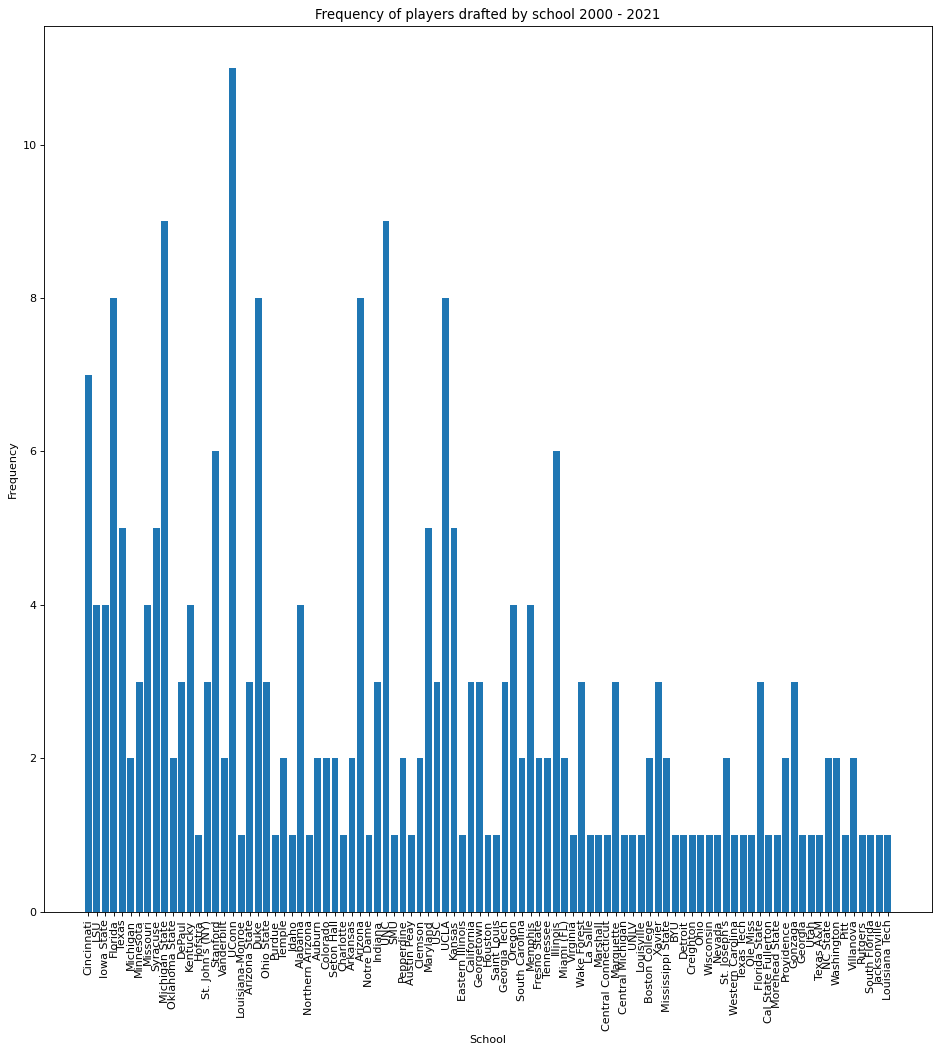

In [88]:
# what schools got more drafted or undrafted players
# What are those schools stat
# maybe over the last 10 years who go more drafted players
drafted_stat = {}

df_1 = pd.DataFrame({'School':college_stats_table["School"]})
for (index, row) in df_1.iterrows():
    if row['School'] in drafted_stat  :
        drafted_stat[row['School']] = drafted_stat[row['School']] + 1
    else:
        drafted_stat[row['School']] = 1
# drafted_stat
output = pd.DataFrame.from_dict(drafted_stat, orient='index')
output = output[0].drop('Overall')

# Range from 1994 to 2014
plt.figure(figsize = (12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("Frequency of players drafted by school 2000 - 2021")
plt.xlabel("School")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(range(len(output.values)), output.index, rotation=90) 
plt.bar(output.index, output.values)
plt.show()

#### The bar chart above shows the relationship between the school a player attends, and then number of players drafted from that school. The top 3 schools that had the most NBA players drafted were UCONN, Michigan State, and UNC.

#### Now let's explore the schools where undrafted players went to.

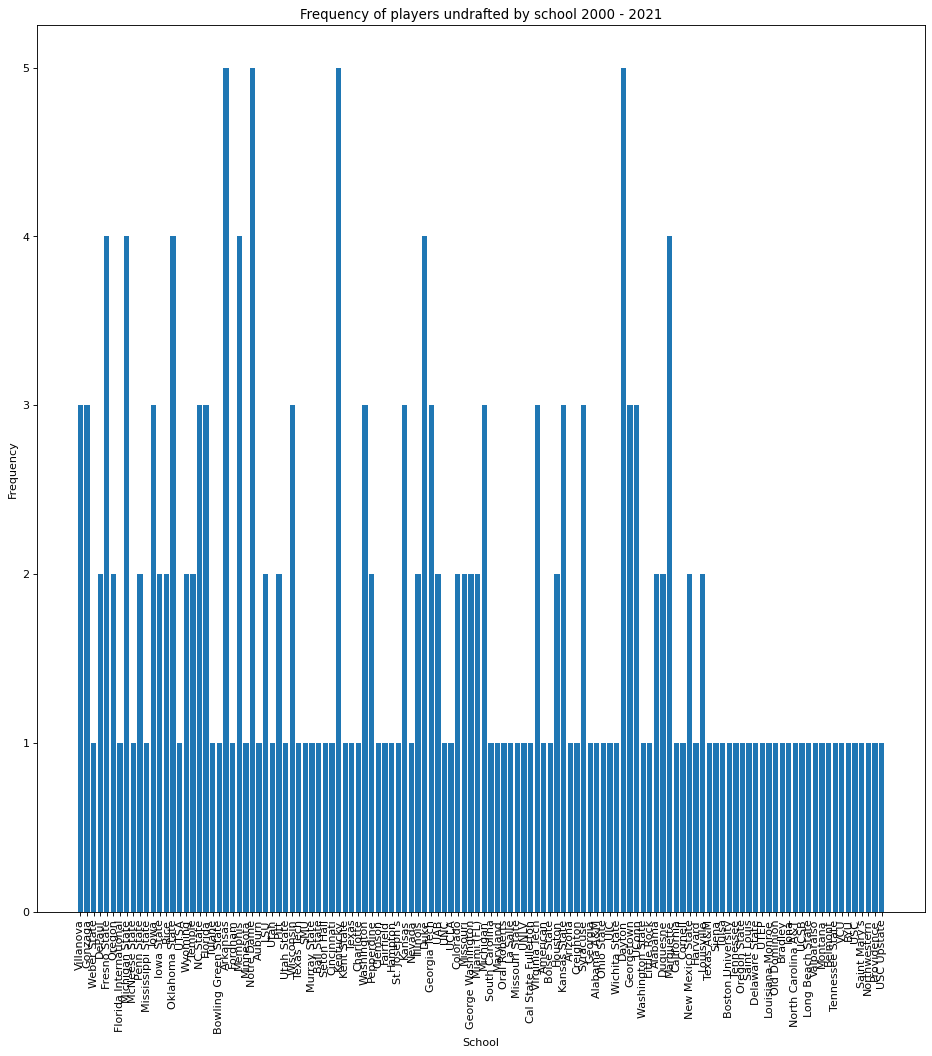

In [89]:
# what schools got more drafted or undrafted players
# What are those schools stat
# maybe over the last 10 years who go more drafted players
drafted_stat = {}

df_1 = pd.DataFrame({'School':college_stats_undrafted_list["School"]})
for (index, row) in df_1.iterrows():
    if row['School'] in drafted_stat  :
        drafted_stat[row['School']] = drafted_stat[row['School']] + 1
    else:
        drafted_stat[row['School']] = 1
# drafted_stat
output = pd.DataFrame.from_dict(drafted_stat, orient='index')
output = output[0].drop('Overall')

# Range from 1994 to 2014
plt.figure(figsize = (12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("Frequency of players undrafted by school 2000 - 2021")
plt.xlabel("School")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(range(len(output.values)), output.index, rotation=90) 
plt.bar(output.index, output.values)
plt.show()

#### The bar chart above shows the schools of those who went undrafted. Notice how there are more schools in this section which suggest that the new schools on this graph hasn't produced any NBA drafted players.

#### Let's see how the average points per game between drafted and non drafted players compares compared to the number of games played.

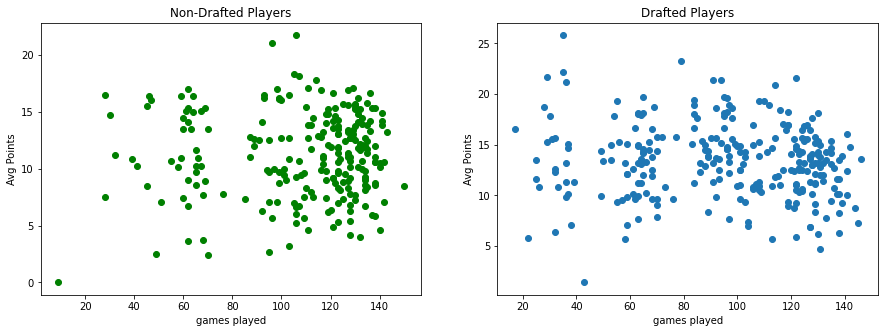

In [90]:
# Creates two subplots and unpacks the output array immediately
x_drafted = college_stats_table['G']
y_drafted = college_stats_table['PTS']
x_undrafted = college_stats_undrafted_list['G']
y_undrafted = college_stats_undrafted_list['PTS']

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_drafted, y_drafted)
ax1.scatter(x_undrafted,y_undrafted, c= 'green')
ax1.set(xlabel='games played', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='games played', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

#### The scatterplots above are pretty similar. One trend it that for both undrafted and drafted players, those who played many games (over 120) usually average somewhere around 10-15 points per game.

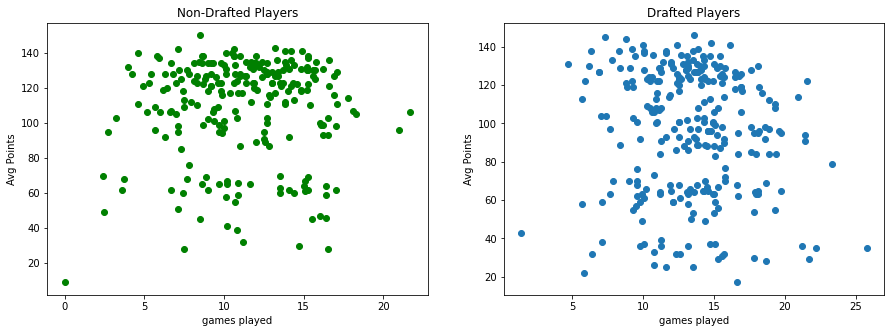

In [91]:
# Creates two subplots and unpacks the output array immediately
x_drafted = college_stats_table['PTS']
y_drafted = college_stats_table['G']
x_undrafted = college_stats_undrafted_list['PTS']
y_undrafted = college_stats_undrafted_list['G']

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_drafted, y_drafted)
ax1.scatter(x_undrafted,y_undrafted, c= 'green')
ax1.set(xlabel='games played', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='games played', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

#### In this Graph, notice that the more games you play the more points you average

In [92]:
drafted_players = college_stats_table[(college_stats_table['PTS'] >= 5)]['PTS']
n_drafted_players = college_stats_undrafted_list[(college_stats_undrafted_list['PTS'] >= 5)]['PTS']

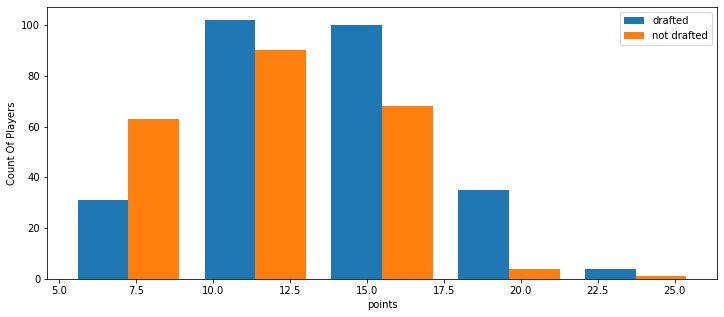

In [93]:
fig, axes = plt.subplots(figsize = (12,5))
labels = ['drafted', 'not drafted']
x = [drafted_players, n_drafted_players]
axes.hist(x, bins = 5, histtype='bar', stacked= False, label = labels)
plt.legend(labels)
plt.xlabel('points')
plt.ylabel('Count Of Players')
plt.show()

#### For this section we want to see if there is a correlation between the players that are drafted and the amount of points they average per game. For this plot we decided to create a bar graph where the blue bars represented the drafted players and the orange bars represented the undrafted players. Towards the right of the graph we can see a decrease in players drafted and undrafted but this is due to the rarity of a player averaging over 15 Points Per Game.  From the graph we see that as points per game increase the frequency of players drafted is much higher than the frequency of the undrafted players. This is likely due to the fact that players that are drafted play against better competition so if they average more points they are very likely to be drafted. As opposed to a player that goes undrafted while averaging many points who likely played against weaker competition in turn making them considered a weaker player.

<AxesSubplot:>

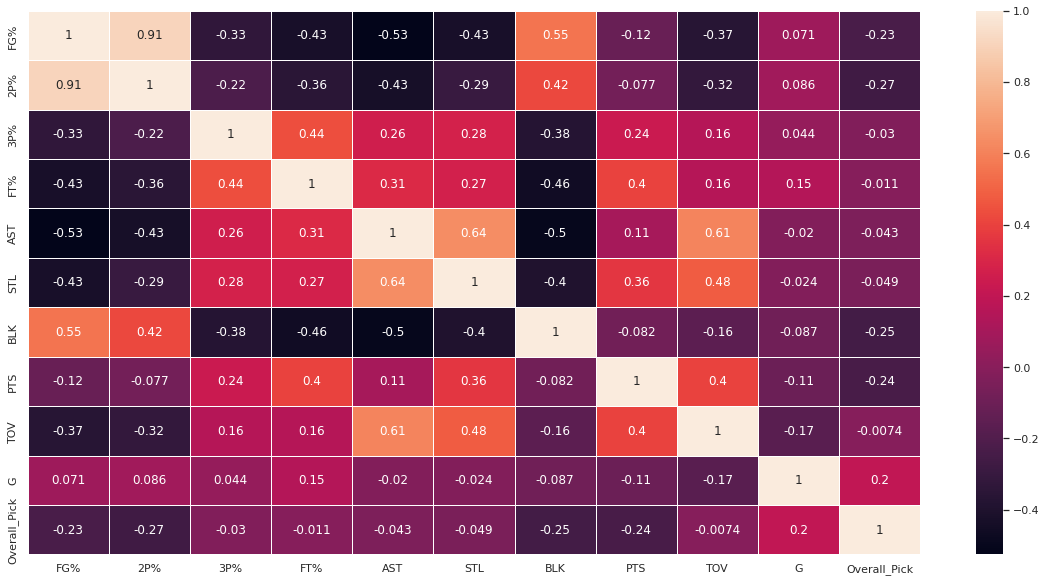

In [94]:
# Plot the graph 
college_stats_table['Overall_Pick'] =pd.to_numeric(college_stats_table['Overall_Pick'])
df = pd.DataFrame (college_stats_table, columns=[ 'FG%', '2P%', '3P%', 'FT%', 'AST', 'STL', 'BLK','PTS','TOV','G','Overall_Pick'])

sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot=True, linewidths=.5)


#### One useful data visualization we can create is a correlation heat map. This visualization is a graphical representations of a correlation matrix which displays the correlation between different variables. Since we have lots of variables and don’t know which are correlated, instead of creating separate charts for each one, the heat map will allow us to view the correlation across all the variables. The value of  a correlation can take any value from -1 to 1, and the closer the value is to 1, the more correlated it is.   Now, we will use this heat map to make an informed decision on which variables are the most important and we should use for our prediction model. We will use FG%, BLK, PTS, and G since these are the most correlated.

## Part 4:  Hypothesis testing

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import sklearn.model_selection as ms
import sklearn.metrics as met

In [102]:
join_stat_table = pd.concat([college_stats_table,college_stats_undrafted_list])
join_stat_table = join_stat_table.drop(
    columns=[ "School", "Season","SOS","GS","MP","FGA","2P", "2PA","3P", "3PA","FT","FTA", "TRB","PF"])
join_stat_table = join_stat_table[join_stat_table['G'].notna()]
join_stat_table = join_stat_table[join_stat_table['FG%'].notna()]
join_stat_table = join_stat_table[join_stat_table['2P%'].notna()]
join_stat_table = join_stat_table[join_stat_table['3P%'].notna()]
join_stat_table = join_stat_table[join_stat_table['FT%'].notna()]
join_stat_table = join_stat_table[join_stat_table['STL'].notna()]
join_stat_table = join_stat_table[join_stat_table['AST'].notna()]
join_stat_table = join_stat_table[join_stat_table['TOV'].notna()]
join_stat_table = join_stat_table[join_stat_table['PTS'].notna()]
join_stat_table = join_stat_table[join_stat_table['BLK'].notna()]
#join_stat_table['isDrafted'] =df.apply(lambda x: 'True' if x['Overall_Pick']==-1  else 'False', axis=1)
#join_stat_table['isDrafted'] = np.where(join_stat_table['Overall_Pick'] ==  -1 , True, False)
join_stat_table

,G,FG,FG%,2P%,3P%,FT%,AST,STL,BLK,TOV,PTS,Overall_Pick
0,116.0,4.4,0.586,0.590,0.222,0.581,1.2,1.1,2.5,1.6,11.0,1
1,50.0,5.1,0.560,0.585,0.242,0.613,0.7,1.3,2.6,2.5,13.4,2
2,97.0,7.1,0.511,0.524,0.292,0.702,1.0,0.9,0.9,2.3,18.9,4
3,65.0,4.5,0.483,0.565,0.345,0.718,2.3,1.2,0.3,2.2,13.3,5
4,32.0,4.4,0.478,0.575,0.371,0.737,1.4,1.0,0.9,1.4,12.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
233,130.0,4.7,0.421,0.482,0.361,0.838,3.0,0.9,0.1,1.5,15.2,-1
234,131.0,5.7,0.413,0.495,0.330,0.671,1.8,1.1,0.8,2.6,16.2,-1
235,142.0,2.3,0.433,0.508,0.407,0.769,0.5,0.4,0.1,0.6,7.1,-1
236,123.0,3.1,0.385,0.407,0.365,0.812,1.1,0.3,0.5,1.5,9.6,-1


In [103]:
x_train, x_test, y_train, y_test = ms.train_test_split(join_stat_table, join_stat_table['Overall_Pick'],random_state=42)
print(x_train.size, x_test.size)
print(y_test)

4560 1524
175    38
3      -1
223    -1
72     43
183    -1
       ..
159    -1
119    50
42      6
51     -1
76     -1
Name: Overall_Pick, Length: 127, dtype: int64


In [115]:
dt = DecisionTreeClassifier(max_depth=7,random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [116]:
predicted = dt.predict(x_test)

In [117]:
actual = np.array(y_test)
predictions = np.array(predicted)
cv = ms.KFold(n_splits=10, random_state=1, shuffle=True)
# Cross validation score
value = ms.cross_val_score(dt, x_train, y_train, cv=cv)
print(value.mean())
print(dt.score(x_test, y_test))

0.581578947368421
0.6377952755905512


In [118]:
#Random Forest
x_t, x_tes, y_t, y_tes = ms.train_test_split(join_stat_table, join_stat_table['Overall_Pick'], random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_t, y_t)
predicted = rfc.predict(x_tes)
actual = np.array(y_tes)
predictions = np.array(predicted)
cv = ms.KFold(n_splits=10, random_state=1, shuffle=True)
# Cross validation score
value = ms.cross_val_score(rfc, x_t, y_t, cv=cv)
print(value.mean())
print(rfc.score(x_tes, y_tes))

0.5236842105263159
0.5275590551181102


## Conclusion

#### After having done a thorough analysis of the statistics of the players that were drafted and undrafted it is safe to say that there is much more that goes into getting drafted into the NBA than statistics. We trained multiple models to try and predict whether a player will be drafted or not but all of the models failed to predict this at a high success rate. This shows that a player can have amazing stats but there is bureaucracy that goes into deciding what players will get drafted. Players in the NBA are usually doing things off the court that get them recognized. It would be extremely difficult to try and take all of the things a player does off the court and quantify it. Some statistics we could possibly use to help improve the model is to take into consideration how many followers the player has. Overall, the way we attempted to solve this problem makes it difficult to create a good model. If we can somehow create an algorithm that quantifies a players social status we will be able to predict who will get drafted more accurately.